In [3]:
# Install imblearn 
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.6.2-py3-none-any.whl (163 kB)



In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import ADASYN 
%matplotlib inline

In [34]:
#df= dataframe to be used for project
df = pd.read_csv ('loaning.csv') 


In [37]:
df.head(5)

,member_id,loan_amnt,int_rate,installment,annual_inc,loan_status
0,1296599,5000,10.65,162.87,24000.0,0
1,1313524,2400,15.96,84.33,12252.0,0
2,1277178,10000,13.49,339.31,49200.0,0
3,1311441,5000,7.90,156.46,36000.0,0
4,1288686,3000,18.64,109.43,48000.0,0


In [38]:
# Shows the total number of rows and columns in the dataset/data frame
print(df.shape)

(208942, 6)


In [39]:
# Shows a break down of the dependent variable loan status represented by 0-(Fully Paid) and 1-(Default)
print(df['loan_status'].value_counts())

0    207723
1      1219
Name: loan_status, dtype: int64


No handles with labels found to put in legend.


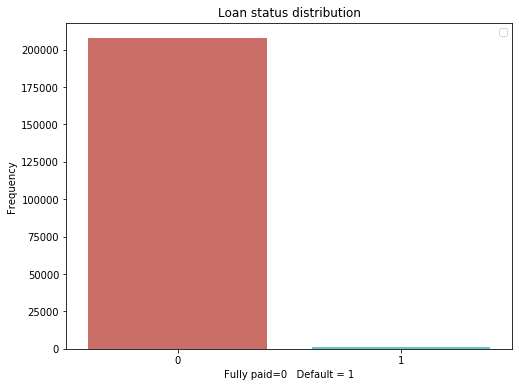

In [42]:
# Plotting a bar graph that shows the imbalanced data set of the target variable
sns.countplot(x ="loan_status", data = df, palette = 'hls')

plt.xlabel("Fully paid=0   Default = 1")
plt.ylabel("Frequency")
plt.title("Loan status distribution");
plt.legend()

plt.show()

In [41]:
plt.rcParams['figure.figsize']= (8,6)

In [43]:
#The names of each column in the dataframe assigned to columns
columns = ['member_id','loan_amnt','int_rate','installment','annual_inc','loan_status']

In [44]:
#Filter the columns to remove data we do not want by taking out the dependent variable
columns = [c for c in columns if c not in ['loan_status']]

In [45]:
# The dependent variable (loan status) is stored as the target
target = 'loan_status'

In [46]:
# Identifying a Random state and assigning columns to X andn Y
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
print(X.shape)
print(Y.shape)

(208942, 5)
(208942,)


In [47]:
#The ADASYN Model is used to Oversample the minority dataset with genetic data
ada = ADASYN(sampling_strategy = 'minority', random_state=420, n_neighbors = 5)
X_res, Y_res = ada.fit_resample(X,Y)

In [53]:
# Creating a confusion matrix to evaluate the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

NameError: name 'y_test' is not defined

In [49]:
# The data set is filled with 206,330 new rows of genetic data 
X_res.shape,Y_res.shape


((415272, 5), (415272,))

In [50]:
# Data set before genetic data is added 
print('Original Target Variable Distribution:',Counter(Y))


Original Target Variable Distribution: Counter({0: 207723, 1: 1219})


In [51]:
# Data set after genetic data is added
print('Oversampled Target Variable Distribution:', Counter(Y_res))


Oversampled Target Variable Distribution: Counter({0: 207723, 1: 207549})


In [69]:
# Exporting the generated  target column data set in csv format

Y_res.to_csv("data bal.csv", index = False)

In [70]:
# Exporting the generated columns in csv format

X_res.to_csv("data bal2.csv", index = False)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test, y_test)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

In [56]:
# Balanced data set is derived from the genetic data and origanal target variable data
dataF = pd.read_csv ('Balanced Loan data.csv')

In [57]:
# Show the number of rows in the balanced loan_status column
dataF["loan_status"].value_counts()

0    207723
1    207549
Name: loan_status, dtype: int64

In [58]:
# Assining the balanced loan_status columns to a variable in order to differentiate it from the intial loanstatus in bar graph
Balanced_loan_status = dataF["loan_status"]

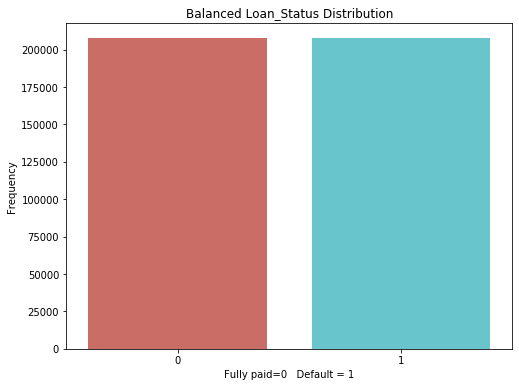

<Figure size 576x432 with 0 Axes>

In [31]:
#Plotting a bar graph of the balanced data
sns.countplot(x = Balanced_loan_status, data = df, palette = 'hls')
plt.xlabel("Fully paid=0   Default = 1")
plt.ylabel("Frequency")
plt.title("Balanced Loan_Status Distribution")
plt.show()
plt.savefig('count_plot')

In [37]:
dataF.shape

(415272, 6)